# <span style="color:green">Beautiful Soup vs Selenium



**BeautifulSoup**
- A module that can be used for pulling data out of HTML and XML documents.
- Depends heavily on other libraries like requests or urllib for sending web requests.
- Does not have a document parser; we need to choose one like, 'html.parser', 'HTML5lib'.
- It is difficult to scrap websites which return Java script code.
- It does not automate the web browser. It saves a copy of web page source and then does further processing

**Selenium**
- A tool developed for web application automated testing.
- Can send web requests on its own It comes with a parser.
- Loads JavaScript and can help access data behind JavaScript files as well. Faster than BeautifulSoup, while interacting with webpages.
- Comes handy when handling Java script featured websites.

<span style="color:red">
In summary, whether Selenium is better than BeautifulSoup depends on the task. If you need to scrape data from dynamic web pages, then Selenium is the better choice. However, if you need to parse HTML and XML documents, then BeautifulSoup is the better choice.

# <span style="color:green">Getting started with Selenium

**Setup**

- **Selenium**- We need to install selenium package.

###### pip install selenium

- **Selenium Drivers**- These web drivers enable python to control the browser for interactions.

- The browser that you will use, chrome or Firefox, should be pre installed.
- Check the version of your browser.
- Visit - chromedriver.chromium.org/downloads
- Download the version of chromedriver that matches the version of your browser. 
- Keep a check of the path where the chromedriver is downloaded.

# <span style="color:blue">Xpath Syntax

- XPath known as the XML path is a language that helps to query the XML documents. It consists of expression for a path along with certain codition to locate a particular element.

- The basic format of Xpath is mentioned below:
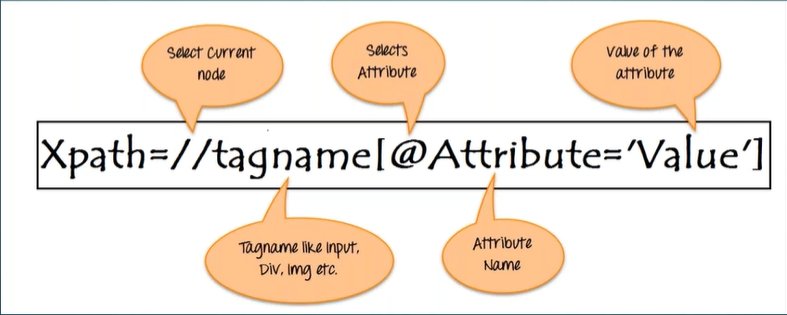

# Types of XPaths

**There are two types of XPath:**
###### Absolute XPath

###### Relative XPath

- **Absolute XPath:** Begins with the single forward slash (/), means we select the element from the root node and go all the way down to the element needed.

/html/body/div[2]/div[1]/div/h4[1]/b/html[1]/body[1]/div[2]/h4[1]/b[1]

- **Relative XPath:** starts from the middle of the HTML structure. Starts with double forward slash (//) and can search elements anywhere on the webpage without writing the long absolute xpath.

//div[@class='featured-box columnsize 1']//h4[1]//b[1]

# XPath Functions

1) **Basic Xpath:** XPath expression select nodes or list of nodes on the basis of attributes like ID, Name, Classname, etc. from the XML document like shown below:

**XPath=//input[@name='uid']**

**XPath=//a[@href='http://google.com/"]**

2) **Contains():** used when the value of any attribute changes dynamically,example, login information. It can find the element with partial text.

For finding 'submit' button where Type= 'submit':

**XPath=//*[contains(@type, 'sub')]**

**XPath=//img[contains(@src,'content')]**

3) **Using OR & AND:** Here, two conditions are used, whether 1st condition OR 2nd condition should be true. Means any one condition should be true to find the element.

**XPath=//*[@type='submit' or @name='btnReset']**

In AND expression, two conditions are used, both conditions should be true to find the element. It fails to find element if any one condition is false.

**XPath=//input[@type='submit' and @name='btnLogin']**

4) **starts-with():** Used to find a web element whose value of an attribute changes on the refresh or on any other dynamic operation on the web page. We match the starting text of the attribute to locate an element whose attribute has changed dynamically.

**XPath=//img[starts-with(@src,'https')]**

5) **text():** Used with the text function to locate an element with exact text. Here, it go anywhere inside the document, irrespective of the tag, but, it must contain a text whose value is Search Google or type a URL. The asterisk (*) implies any tag with the same value.

**XPath=//*[text()='Search Google or type a URL']**

# Copy & Pasting of elements 

**ctrl A + ctrl C + ctrl F + ctrl C**

# <span style="color:red">Web scraping on Naukri.com Using Selenium.

**!pip install selenium**

In [1]:
#import necessary libraries
import selenium
from selenium import webdriver
from selenium.webdriver.common.by import By 
import time

#ignore unnecessary warning
import warnings
warnings.filterwarnings('ignore')

#### Now we will download the webDriver for the Web Browser.Steps for download are

- 1. Check the version of your browser
- 2. go to the link https://chromedriver.chromium.org/downloads
- 3. Download webdriver for your version of your browser.

In [2]:
# Let's first connect to the driver
driver = webdriver.Chrome(r"C:\Users\nirma\Downloads\chromedriver-win64\chromedriver-win64\chromedriver.exe")

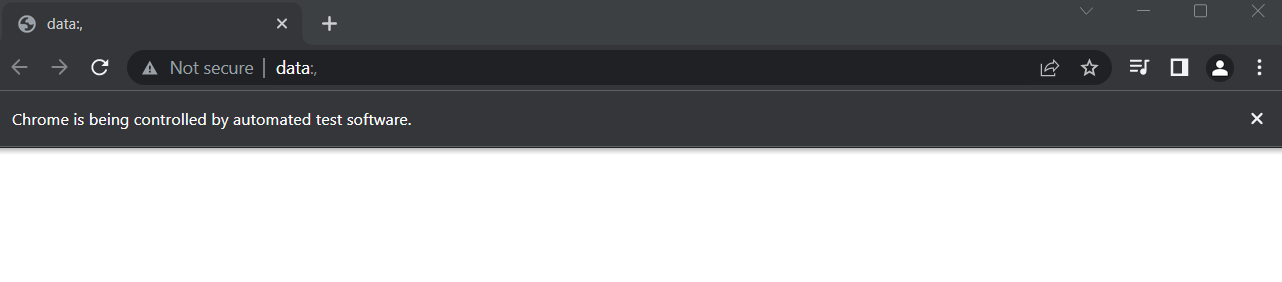

In [3]:
# opening the naukri page on automated chrome browser
driver.get("https://www.naukri.com")

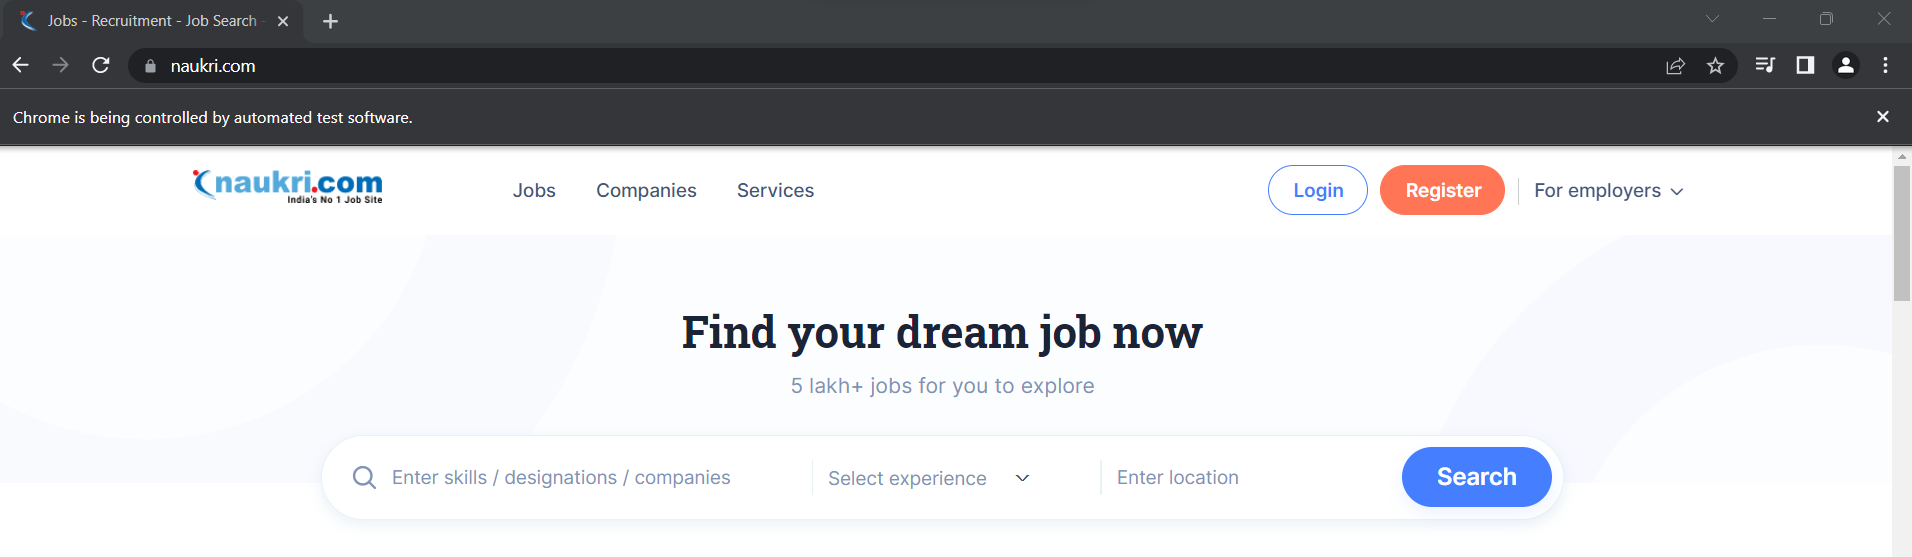

In [4]:
# entering designation and location as required in the questions-

designation = driver.find_element(By.CLASS_NAME,"suggestor-input")
designation.send_keys('Data Analyst')

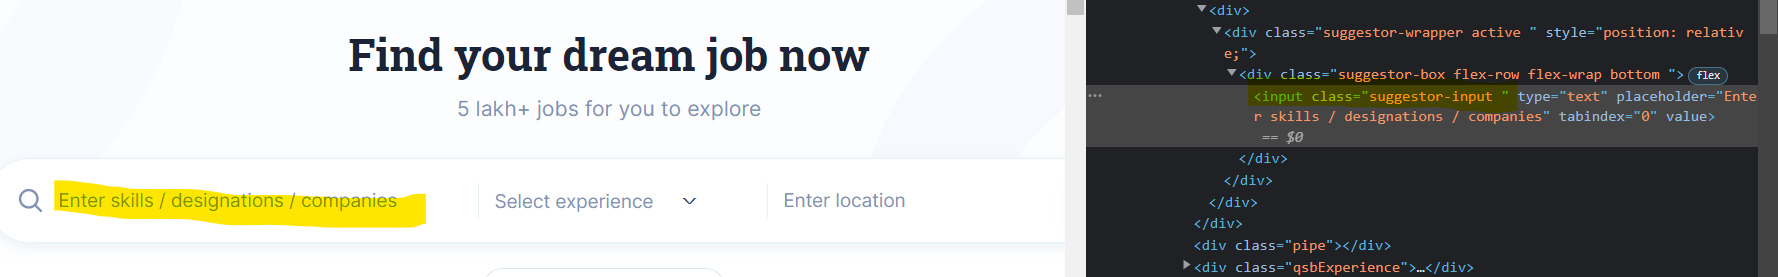
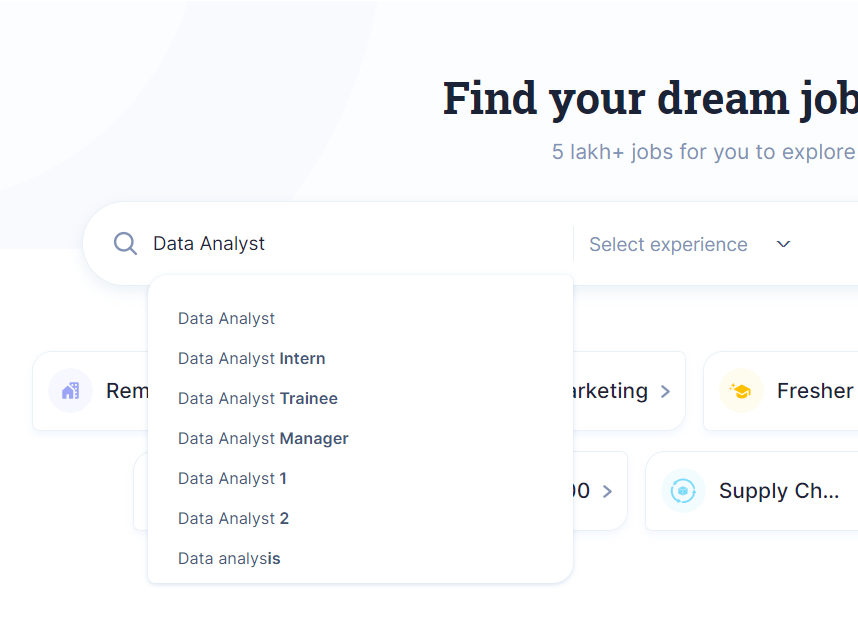

In [5]:
# using xpath method # method to extract absolute xpath

location = driver.find_element(By.XPATH,"/html/body/div[1]/div[6]/div/div/div[5]/div/div/div/input")

location.send_keys('Bangalore')

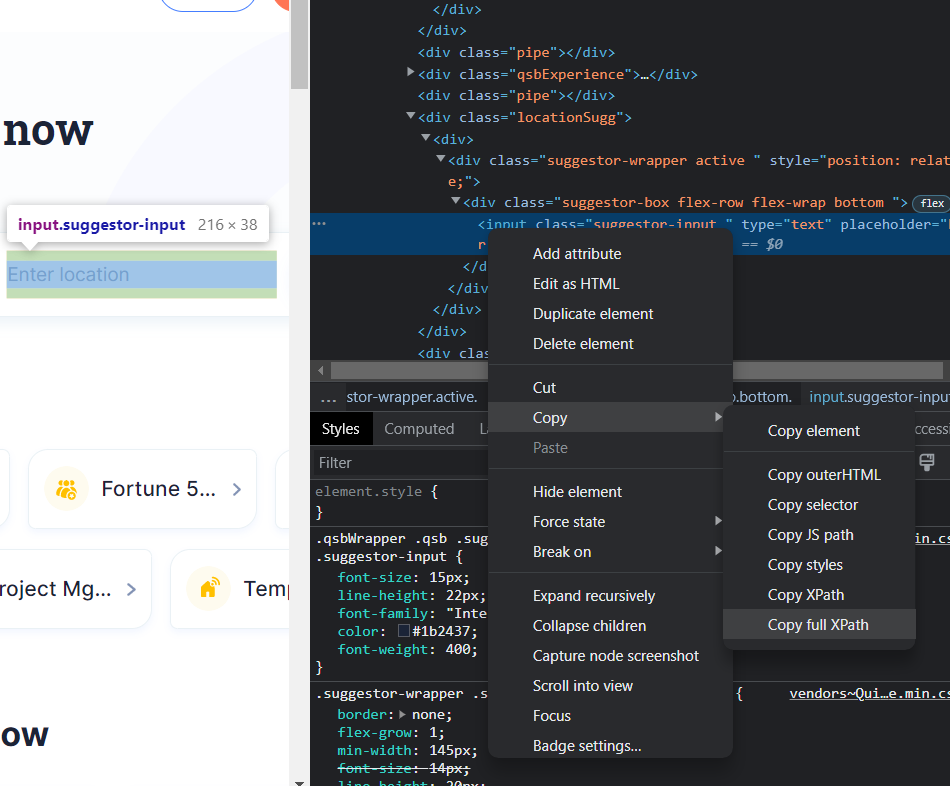
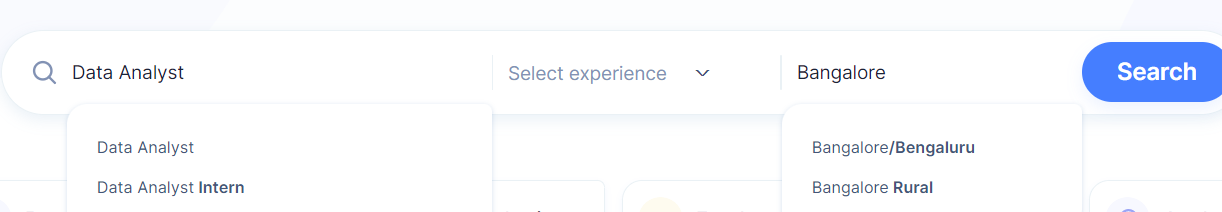

In [6]:
# clicking on search bar using .click()

search=driver.find_element(By.CLASS_NAME,"qsbSubmit")
search.click()

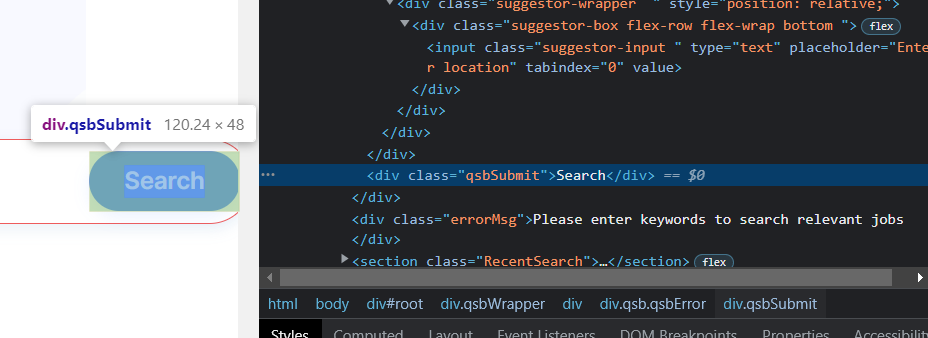
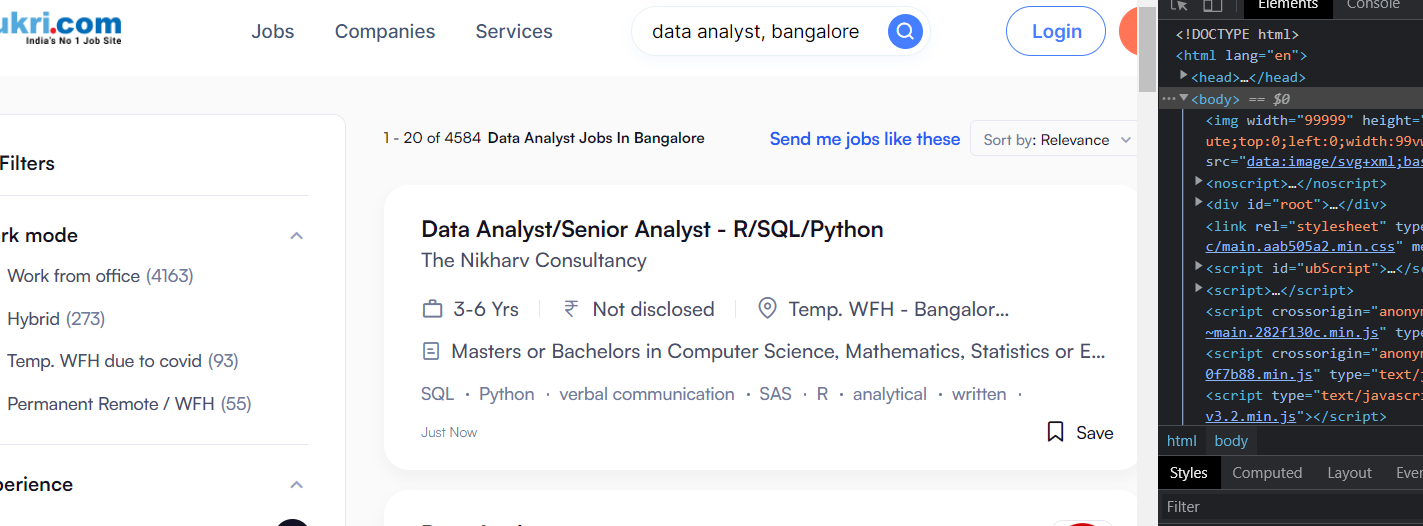

In [7]:
# create empty list for different attributes
job_title=[]
job_location=[]
company_name=[]
experience_required=[] 

In [12]:
# Locating Job title from the given page
title_tags=driver.find_elements(By.XPATH,'//a[@class="title ellipsis"]')
#Scraping Job title from the given page
for i in title_tags[0:10]:
    title=i.text
    job_title.append(title)


# Locating Job Location from the given page
location_tags=driver.find_elements(By.XPATH,'//span[@class="ellipsis fleft locWdth"]')
# Scraping Job Location from the given page
for i in location_tags[0:10]:
    location=i.text
    job_location.append(location)

# Locating company name from the given page
company_tags=driver.find_elements(By.XPATH,"//a[@class='subTitle ellipsis fleft']")
# Scraping company name from the given page
for i in company_tags[0:10]:
    company=i.text
    company_name.append(company)

# Locating Job Experience from the given page
experience_tags=driver.find_elements(By.XPATH,'//span[@class="ellipsis fleft expwdth"]')
# Scraping Job Experience from the given page
for i in experience_tags[0:10]:
    exp=i.text
    experience_required.append(exp)

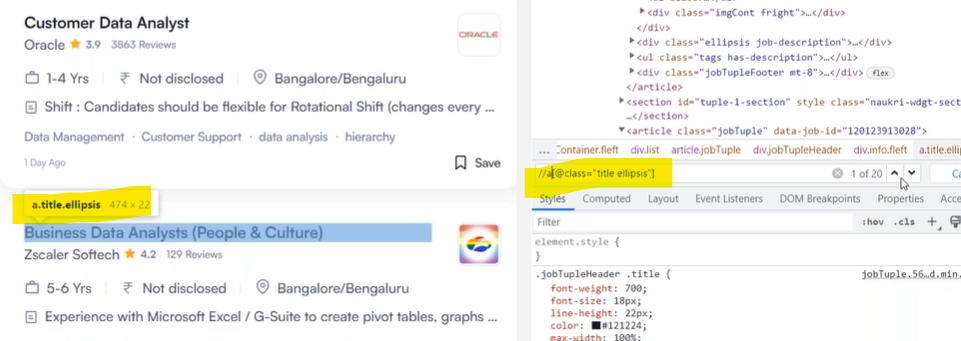

In [13]:
#Printing the length of each attribute
print(len(job_title),len(job_location),len(company_name),len(experience_required))

10 10 10 10


In [14]:
##creating dataframe for different attributes
import pandas as pd
df=pd.DataFrame({'Title':job_title,'Location':job_location,'Company_name':company_name,'Experience':experience_required})
df

,Title,Location,Company_name,Experience
0,Data Analyst / Senior Analyst - R / SQL / Python,"Bangalore/Bengaluru, Kolkata, Mumbai, Hyderaba...",The Nikharv Consultancy,3-6 Yrs
1,Data Analyst/Senior Analyst - R/SQL/Python,"Temp. WFH - Bangalore/Bengaluru, Kolkata, Mumb...",The Nikharv Consultancy,3-6 Yrs
2,Data Analyst,Bangalore/Bengaluru,Target,2-4 Yrs
3,data analyst / data analytics - US MNC (analyt...,"Temp. WFH - Bangalore/Bengaluru, Gurgaon/Gurugram",Aspyra Hr Services,3-8 Yrs
4,Business Data Analyst (Sr Exe / Asst Manager),Bangalore/Bengaluru,Talentleads,3-5 Yrs
5,Junior Data Analyst/ Scientist- Fresher Position,"Hybrid - Bangalore/Bengaluru, New Delhi, Mumba...",Sejal Consulting Hub,0-5 Yrs
6,Staff Data Analyst,Bangalore/Bengaluru,Walmart,10-14 Yrs
7,Reference Data Analyst,Bangalore/Bengaluru,Deutsche Bank,6-8 Yrs
8,Sr Data Analyst,Hybrid - Bangalore/Bengaluru,Amolitalents,6-9 Yrs
9,Job Opportunity with Leading MNC - Senior Data...,Bangalore/Bengaluru,Enrich And Enlight Business Consulting,5-7 Yrs


# <span style="color:green"> How to fetch the URL?

In [15]:
# Locating  URL
url=driver.find_elements(By.XPATH,'//a[@class="title ellipsis"]')
url[0:4]

[<selenium.webdriver.remote.webelement.WebElement (session="cec5e123e005c9238638b7cb5107aa6d", element="6ed8636e-7e4c-4a78-bb20-98fdda58548a")>,
 <selenium.webdriver.remote.webelement.WebElement (session="cec5e123e005c9238638b7cb5107aa6d", element="7c1111b7-c029-4c25-973c-ffb97a0ea047")>,
 <selenium.webdriver.remote.webelement.WebElement (session="cec5e123e005c9238638b7cb5107aa6d", element="ee5cdd31-d7ca-40df-867a-71eb982ef1c9")>,
 <selenium.webdriver.remote.webelement.WebElement (session="cec5e123e005c9238638b7cb5107aa6d", element="1bbf4cc2-0e93-423e-9c4c-3a04f8026060")>]

In [16]:
#fetching URl
for i in url[0:4]: # Let's provide range to print only top 4 data

    print(i.get_attribute('href'))

https://www.naukri.com/job-listings-data-analyst-senior-analyst-r-sql-python-the-nikharv-consultancy-kolkata-mumbai-hyderabad-secunderabad-lucknow-chennai-ahmedabad-delhi-ncr-bangalore-bengaluru-3-to-6-years-220123901941
https://www.naukri.com/job-listings-data-analyst-senior-analyst-r-sql-python-the-nikharv-consultancy-kolkata-mumbai-hyderabad-secunderabad-pune-chennai-ahmedabad-bangalore-bengaluru-delhi-ncr-3-to-6-years-220123901469
https://www.naukri.com/job-listings-data-analyst-target-corporation-india-pvt-ltd-bangalore-bengaluru-2-to-4-years-200123502252
https://www.naukri.com/job-listings-data-analyst-data-analytics-us-mnc-analytics-aspyra-hr-services-gurgaon-gurugram-bangalore-bengaluru-3-to-8-years-200123008246


# <span style="color:green">How to fetch data from multiple pages?

In [17]:
job_title=[]

In [19]:
start=0
end=2
for page in range(start,end):
    titles=driver.find_elements(By.XPATH,'//a[@class="title ellipsis"]')
    for i in titles:
        job_title.append(i.text)
        
    #to scrap data from next pages
    next_button=driver.find_element(By.XPATH,'//a[@class="fright fs14 btn-secondary br2"]')  
    next_button.click()
    time.sleep(3)

In [20]:
len(job_title)

40

In [21]:
job_title

['Data Analyst / Senior Analyst - R / SQL / Python',
 'Data Analyst/Senior Analyst - R/SQL/Python',
 'Data Analyst',
 'data analyst / data analytics - US MNC (analytics)',
 'Business Data Analyst (Sr Exe / Asst Manager)',
 'Junior Data Analyst/ Scientist- Fresher Position',
 'Staff Data Analyst',
 'Reference Data Analyst',
 'Sr Data Analyst',
 'Job Opportunity with Leading MNC - Senior Data Analyst',
 'Manager/Senior Manager - Data Analyst',
 'Data Analyst (Jr/Sr)',
 'Junior Data Analyst',
 'Data Analyst , Data Analytics',
 'Data Analyst',
 'Manager - Data Analyst',
 'Data Analyst',
 'Data Analyst',
 'Immediate Hiring For MIS and Data Analyst',
 'Immediate Hiring For Data Analyst - Technology consultant || Bangalore',
 'Hiring For HR Data Analysts',
 'Croma - Data Analyst - Mumbai / Bangalore',
 'Data Analysts - Compliance Surveillance',
 'Reference Data Analyst',
 'Lead - Data & Business Analyst (Analytics)',
 'Data Analyst / Sr. Data Analyst / Lead',
 'Data Analyst',
 'Data Analyst/S

# <span style="color:green">How to scrape the table?

In [5]:
# Initialize Chrome WebDriver
driver = webdriver.Chrome(r"C:\Users\nirma\Downloads\chromedriver-win64\chromedriver-win64\chromedriver.exe")
driver.get("https://www.theguardian.com/news/datablog/2012/aug/09/best-selling-books-all-time-fifty-shades-grey-compare")
driver.maximize_window()
time.sleep(5)

In [4]:
#FIRST SCRAPE THE TABLE

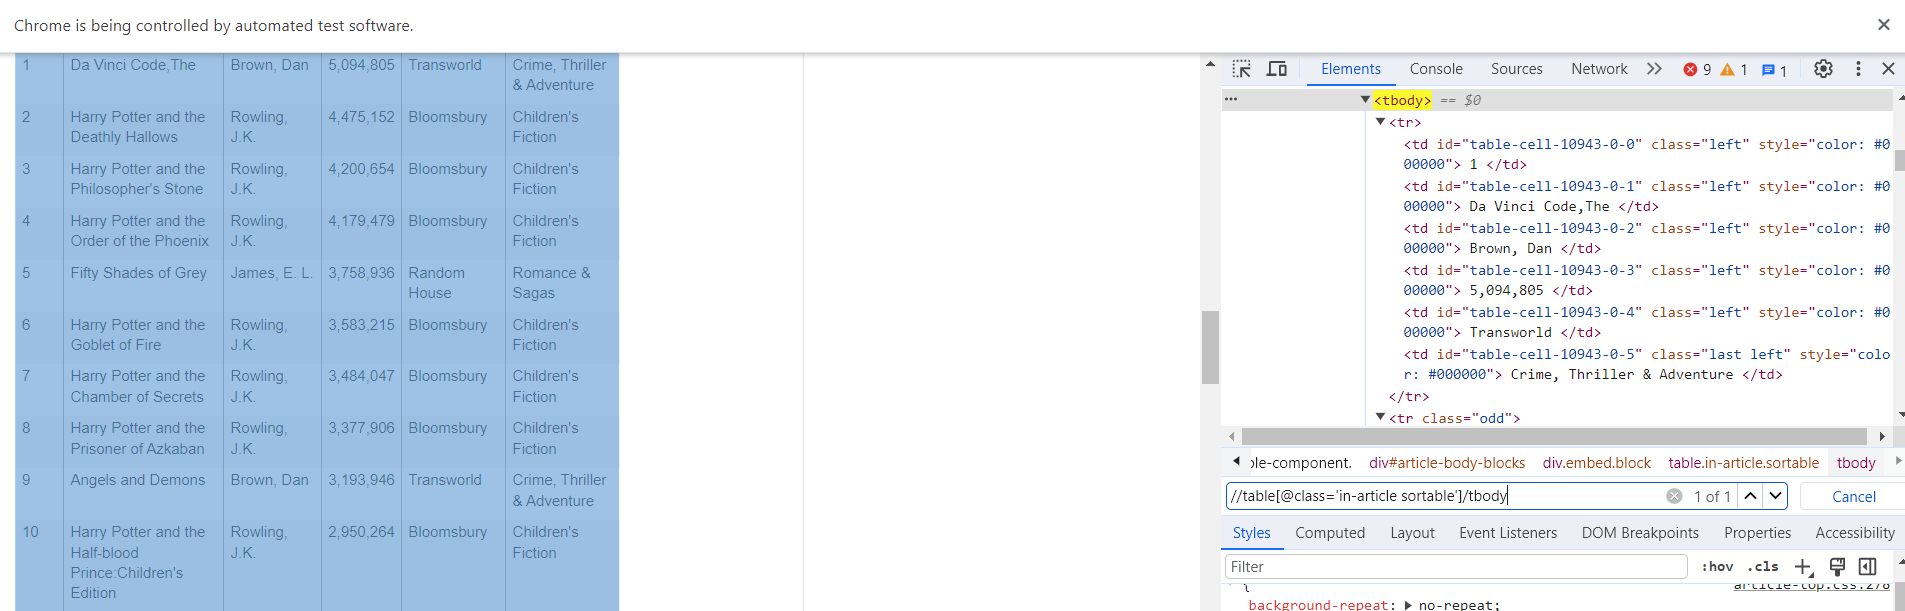

In [6]:
#THEN GO THE TABLE ROW

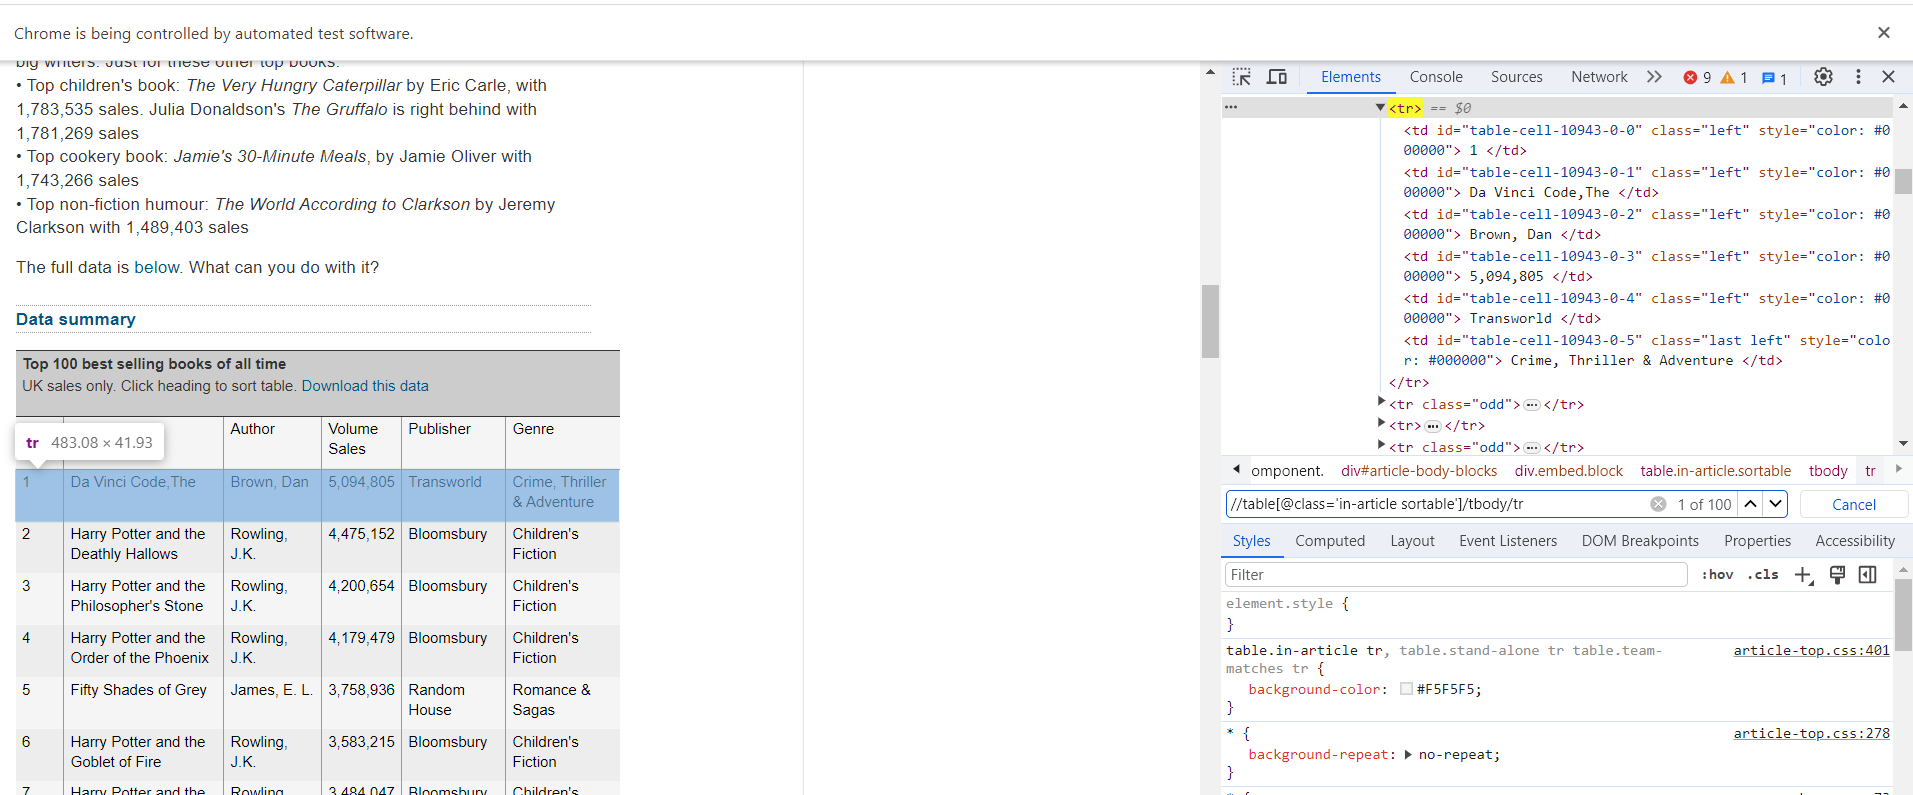

In [7]:
#NOW SCRAPE THE TABLE COLUMN DATA 

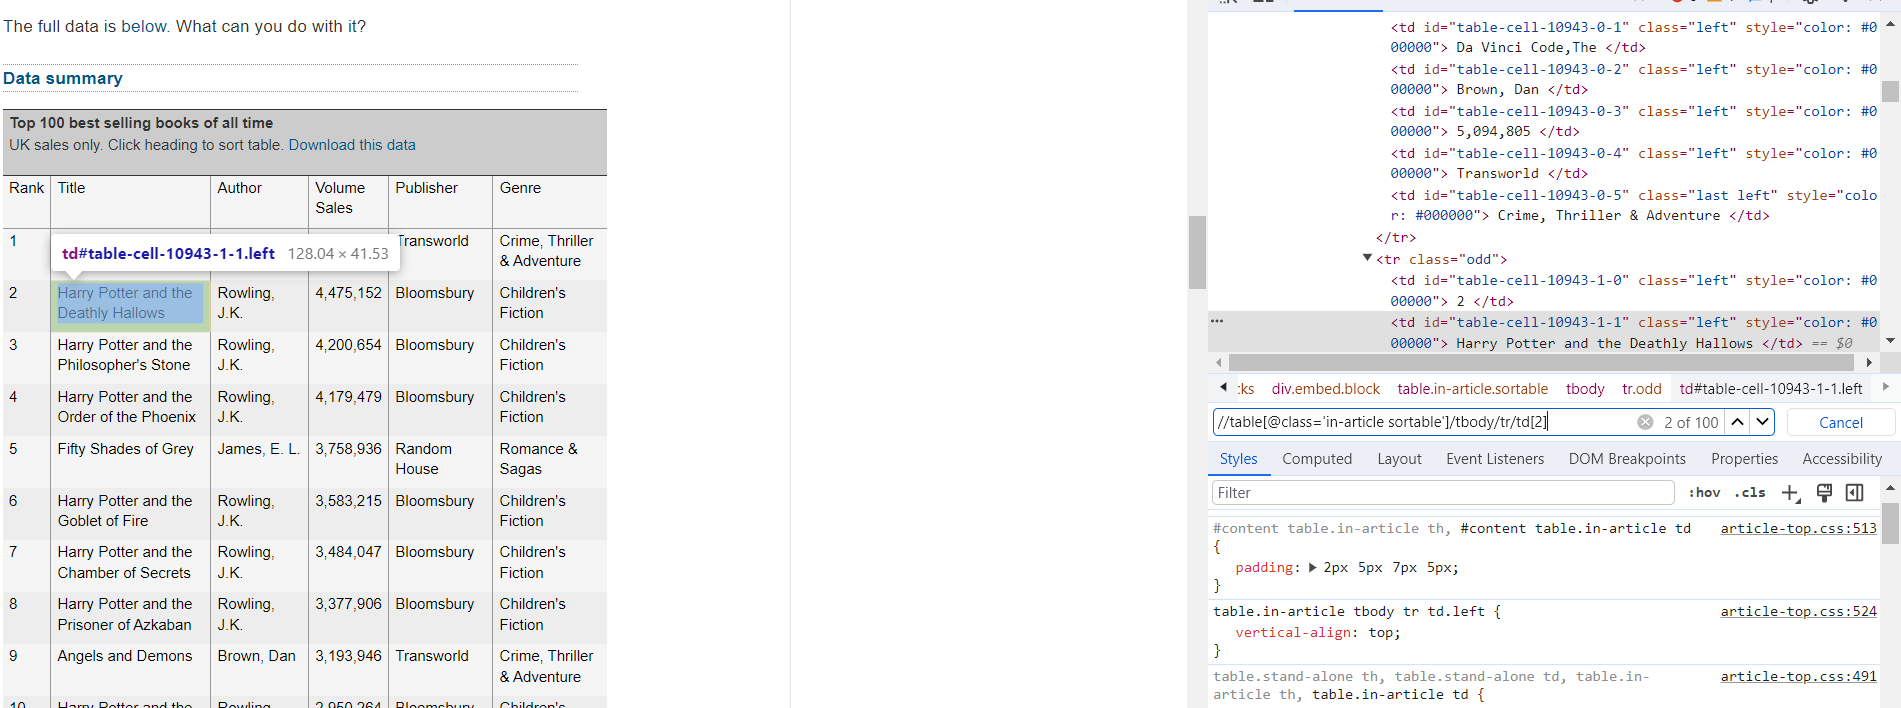

In [8]:
#scraping the Book names
name =[]
try:
    names=driver.find_elements(By.XPATH,"//table[@class='in-article sortable']/tbody/tr/td[2]")
    for i in names:
        name.append(i.text)
except NoSuchElementException: #handling no such element exception
    name.append('No details available')
except StaleElementReferenceException: #handling Stale element exception
    name.append('No details available')
    time.sleep(2) 

In [10]:
len(name)

100

In [11]:
# Name of the best-selling-books
print(name)

['Da Vinci Code,The', 'Harry Potter and the Deathly Hallows', "Harry Potter and the Philosopher's Stone", 'Harry Potter and the Order of the Phoenix', 'Fifty Shades of Grey', 'Harry Potter and the Goblet of Fire', 'Harry Potter and the Chamber of Secrets', 'Harry Potter and the Prisoner of Azkaban', 'Angels and Demons', "Harry Potter and the Half-blood Prince:Children's Edition", 'Fifty Shades Darker', 'Twilight', 'Girl with the Dragon Tattoo,The:Millennium Trilogy', 'Fifty Shades Freed', 'Lost Symbol,The', 'New Moon', 'Deception Point', 'Eclipse', 'Lovely Bones,The', 'Curious Incident of the Dog in the Night-time,The', 'Digital Fortress', 'Short History of Nearly Everything,A', 'Girl Who Played with Fire,The:Millennium Trilogy', 'Breaking Dawn', 'Very Hungry Caterpillar,The:The Very Hungry Caterpillar', 'Gruffalo,The', "Jamie's 30-Minute Meals", 'Kite Runner,The', 'One Day', 'Thousand Splendid Suns,A', "Girl Who Kicked the Hornets' Nest,The:Millennium Trilogy", "Time Traveler's Wife,T